### Libraries

In [1]:
import pandas as pd

### Load Data

In [12]:
df = pd.read_csv('Query_AI_text_clean.csv')

In [18]:
df.shape

(590, 17)

In [15]:
df.sample(3)

,id,indexed_date,language,media_name,media_url,publish_date,title,url,year,text,text_downloaded,GPE,IND,ORG,entities,clean_text
9,a660ee2090e39ff389e0b4d39e5b82fd6fa7d03dde20e6...,2024-09-03 12:22:54.186669,en,technologyreview.com,technologyreview.com,2024-09-03,Here’s how ed-tech companies are pitching AI t...,https://www.technologyreview.com/2024/09/03/11...,2024,Here’s how ed-tech companies are pitching AI t...,True,['South Korea' 'Japan' 'Singapore' 'US' 'North...,"['Leon Furze', 'Antonio Regalado.']",['ChatGPT' 'AI' 'Magic School' 'Khan Academy' ...,"['MIT', 'Google DeepMind', 'South Korea', 'Kha...",here ed tech company pitch ai teacher hundred ...
51,24d8b7d3907de0443acd84f8148641ed55fff7b530d426...,2024-07-23 15:28:22.724307,en,technologyreview.com,technologyreview.com,2024-07-23,How’s AI self-regulation going?,https://www.technologyreview.com/2024/07/23/10...,2024,How’s AI self-regulation going?\nOne year on f...,True,['US' 'US' 'US' 'US' 'US' 'US' 'the United Sta...,"['Joe Biden', 'Donald Trump', 'Donald Trump', ...","[""the White House's"" 'AI' 'the White House' 'A...","['James O’Donnell', 'MIT', 'Google DeepMind', ...",how ai self regulation go one year white house...
405,67910ff5fe17ef68bc1d3b528a52f0bc126fdf95dbcba3...,2024-03-02 05:09:35.409740,en,technologyreview.com,technologyreview.com,2023-03-22,These new tools let you see for yourself how b...,https://www.technologyreview.com/2023/03/22/10...,2023,These new tools let you see for yourself how b...,True,['US'],"['Hugging Face', 'Sasha Luccioni', 'Yacine Jer...",['AI startup Hugging Face' 'Leipzig University...,"['Sasha Luccioni', 'US', 'Google DeepMind', 'C...",these new tool let biased ai image model bias ...


### Clean Data

In [19]:
df.columns

Index(['id', 'indexed_date', 'language', 'media_name', 'media_url',
       'publish_date', 'title', 'url', 'year', 'text', 'text_downloaded',
       'GPE', 'IND', 'ORG', 'entities', 'clean_text', 'text_clean'],
      dtype='object')

Lematization

In [4]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

In [5]:
nlp = spacy.load("en_core_web_sm")

In [41]:
df['text_clean'] = df['title'] + ' ' + df['text'] 

In [43]:
df.text[1]

'What impact will AI have on video game development?\nIt could make working conditions more bearable—or it could just put people out of work.\nThis story is from The Algorithm, our weekly newsletter on AI. To get it in your inbox first, sign up here.\nVideo game development has long been plagued by fear of the “crunch”—essentially, being forced to work overtime on a game to meet a deadline. In the early days of video games, the crunch was often viewed as a rite of passage: In the last days before release, an obsessed group of scrappy developers would work late into the night to perfect their dream game.\nHowever, nowadays the crunch is less likely to be glamorized than to be seen as a form of exploitation that risks causing mental illness and burnout. Part of the issue is that crunch time used to be just before a game launched, but now whole game development periods are “crunchy.” With games getting more expensive, companies are incentivized to make even more short-term profits by sque

In [45]:
words={'ai'}
# Función para limpiar el texto
def clean_text(text):
    # Procesar el texto con spaCy
    doc = nlp(text)
    
    # Lematizar y filtrar stopwords, puntuación y palabras personalizadas
    tokens = [token.lemma_.lower() for token in doc 
              if token.text.lower() not in STOP_WORDS  # Eliminar stopwords
              and token.is_alpha  # Mantener solo caracteres alfabéticos
              and token.text.lower() not in string.punctuation  # Eliminar puntuación
              and token.text.lower() not in words]  # Eliminar palabras específicas
    
    # Unir los tokens limpios en un solo string
    return ' '.join(tokens)

In [46]:
# Aplicar la función de limpieza a la columna 'text'
df['clean_text'] = df['text_clean'].apply(clean_text)

In [47]:
df = df.drop('text_clean', axis=1)

In [48]:
df.head()

,id,indexed_date,language,media_name,media_url,publish_date,title,url,year,text,text_downloaded,GPE,IND,ORG,entities,clean_text
0,fa04f2a7d53cfa67cbac5db21f72131b58dc5d3ef13560...,2024-09-10 15:28:41.289382,en,technologyreview.com,technologyreview.com,2024-09-10,2024 Innovator of the Year: Shawn Shan builds ...,https://www.technologyreview.com/2024/09/10/11...,2024,2024 Innovator of the Year: Shawn Shan builds ...,True,['Midjourney'],"['Shawn Shan', 'Shawn Shan', 'Shawn Shan', 'Be...",['Glaze' 'Nightshade' 'MIT Technology Review' ...,"['Amy Nordrum', 'Nightshade', 'Google DeepMind...",innovator year shawn shan build tool help arti...
1,00dd081954ae78bb816f397a15f0a5f1f08cc32519c4e4...,2024-09-10 11:19:31.849908,en,technologyreview.com,technologyreview.com,2024-09-10,What impact will AI have on video game develop...,https://www.technologyreview.com/2024/09/10/11...,2024,What impact will AI have on video game develop...,True,['Midjourney' 'LA' 'Netherlands'],['Josh Kahn'],['a16z' 'Ubisoft' 'ChatGPT' 'ChatGPT' 'AI' 'AI...,"['the US National Security Agency', 'Google De...",impact video game development impact video gam...
2,dd81b8f5f198bf90f181d1608d05a1955803324090ed07...,2024-09-09 23:21:56.858516,en,technologyreview.com,technologyreview.com,2024-09-09,"To be more useful, robots need to become lazier",https://www.technologyreview.com/2024/09/09/11...,2024,"To be more useful, robots need to become lazie...",True,['Netherlands' 'Tech United' 'UK'],"['René van de Molengraft', 'Van de Molengraft'...",['Eindhoven University of Technology' 'RoboCup...,"['Google DeepMind', 'Amazon Robotics', 'Van de...",useful robot need lazy useful robot need lazy ...
3,6e756b42d864508050ba087a650179d05ac91be0b4855d...,2024-09-06 18:23:28.427532,en,technologyreview.com,technologyreview.com,2024-09-06,Roblox is launching a generative AI that build...,https://www.technologyreview.com/2024/09/06/11...,2024,Roblox is launching a generative AI that build...,True,['France' 'Paris'],"['Marcus Holmström', 'Anupam Singh', 'Chris To...",['The Gang' 'Roblox' 'AI' 'Roblox' 'AI' 'Kent ...,"['Marcus Holmström', 'Google DeepMind', 'ChatG...",roblox launch generative build environment sna...
4,3ac10c795421811068dff2c020f48849fad908cb32cb47...,2024-09-05 15:28:38.006311,en,technologyreview.com,technologyreview.com,2024-09-05,Integrating security from code to cloud,https://www.technologyreview.com/2024/09/05/10...,2024,Sponsored\nIntegrating security from code to c...,True,['withMicrosoft' 'Jiankui'],"['David Harmon', 'Vlad Korsunsky']",['AMD' 'The Human Genome Project' 'SpaceX' 'Te...,"['AMD EPYC', 'Google DeepMind', 'Microsoft Sec...",integrate security code cloud sponsored integr...


In [26]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
# Define helper function
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    Returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample.
    '''
    # Vectoriza el texto
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    
    # Suma de las ocurrencias de cada palabra en todos los documentos
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    
    # Obtiene los índices de las palabras ordenadas por frecuencia
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    
    # Obtiene los valores de las frecuencias
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    # Prepara los vectores de palabras más frecuentes
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i, word_indices[0, i]] = 1

    # Obtiene las palabras correspondientes a los índices más frecuentes
    words = [word for word in count_vectorizer.inverse_transform(word_vectors)[0]]

    return (words, word_values[0,:n_top_words].tolist()[0])


In [50]:
count_vectorizer = CountVectorizer()

In [34]:
import numpy as np 

In [51]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

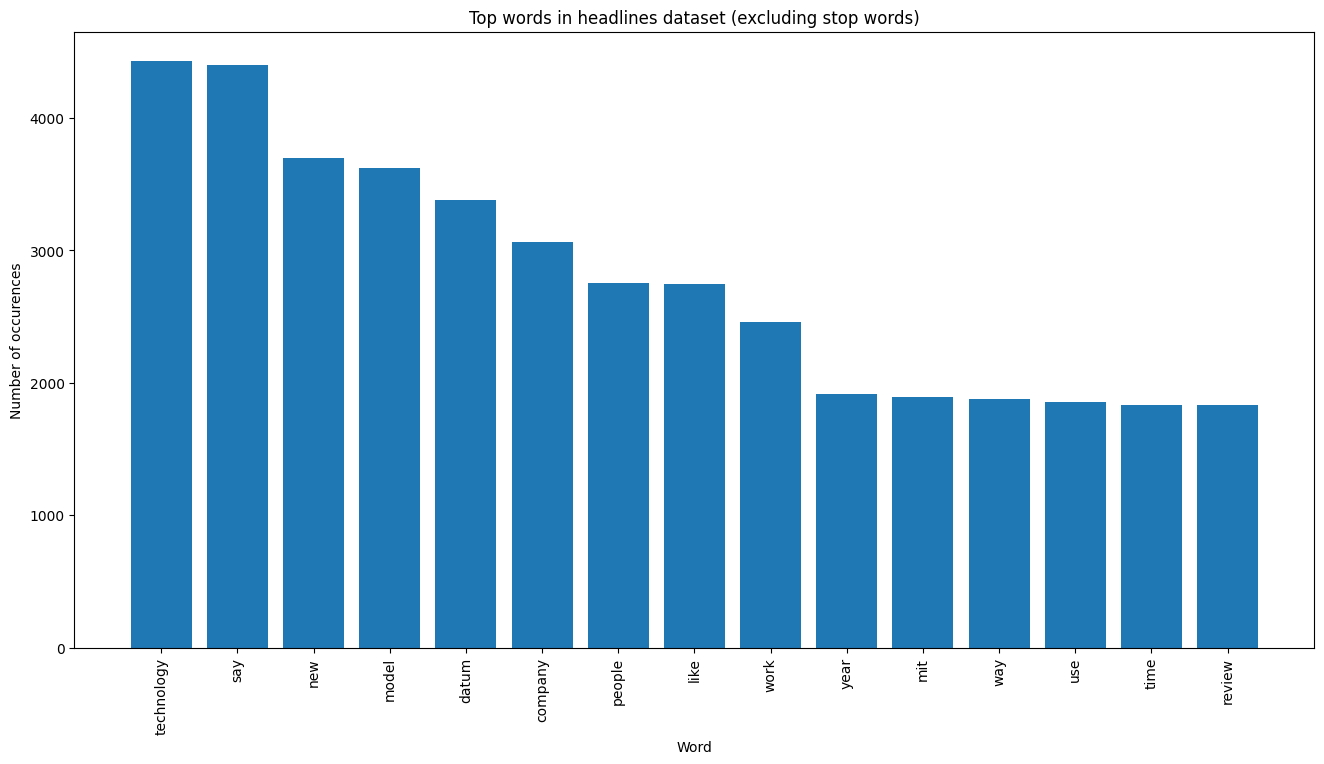

In [52]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['clean_text'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [10]:
df.head()

,id,indexed_date,language,media_name,media_url,publish_date,title,url,year,text,text_downloaded,GPE,IND,ORG,entities,clean_text
0,fa04f2a7d53cfa67cbac5db21f72131b58dc5d3ef13560...,2024-09-10 15:28:41.289382,en,technologyreview.com,technologyreview.com,2024-09-10,2024 Innovator of the Year: Shawn Shan builds ...,https://www.technologyreview.com/2024/09/10/11...,2024,2024 Innovator of the Year: Shawn Shan builds ...,True,[Midjourney],"[Shawn Shan, Shawn Shan, Shawn Shan, Ben Zhao,...","[Glaze, Nightshade, MIT Technology Review, the...","[Amy Nordrum, Nightshade, Google DeepMind, Sha...",innovator year shawn shan build tool help arti...
1,00dd081954ae78bb816f397a15f0a5f1f08cc32519c4e4...,2024-09-10 11:19:31.849908,en,technologyreview.com,technologyreview.com,2024-09-10,What impact will AI have on video game develop...,https://www.technologyreview.com/2024/09/10/11...,2024,What impact will AI have on video game develop...,True,"[Midjourney, LA, Netherlands]",[Josh Kahn],"[a16z, Ubisoft, ChatGPT, ChatGPT, AI, AI, AI, ...","[the US National Security Agency, Google DeepM...",what impact ai video game development it worki...
10,dd81b8f5f198bf90f181d1608d05a1955803324090ed07...,2024-09-09 23:21:56.858516,en,technologyreview.com,technologyreview.com,2024-09-09,"To be more useful, robots need to become lazier",https://www.technologyreview.com/2024/09/09/11...,2024,"To be more useful, robots need to become lazie...",True,"[Netherlands, Tech United, UK]","[René van de Molengraft, Van de Molengraft, Va...","[Eindhoven University of Technology, RoboCup, ...","[Google DeepMind, Amazon Robotics, Van de Mole...",to useful robot need lazy smarter datum proces...
14,6e756b42d864508050ba087a650179d05ac91be0b4855d...,2024-09-06 18:23:28.427532,en,technologyreview.com,technologyreview.com,2024-09-06,Roblox is launching a generative AI that build...,https://www.technologyreview.com/2024/09/06/11...,2024,Roblox is launching a generative AI that build...,True,"[France, Paris]","[Marcus Holmström, Anupam Singh, Chris Totten]","[The Gang, Roblox, AI, Roblox, AI, Kent State ...","[Marcus Holmström, Google DeepMind, ChatGPT, F...",roblox launch generative ai build environment ...
19,3ac10c795421811068dff2c020f48849fad908cb32cb47...,2024-09-05 15:28:38.006311,en,technologyreview.com,technologyreview.com,2024-09-05,Integrating security from code to cloud,https://www.technologyreview.com/2024/09/05/10...,2024,Sponsored\nIntegrating security from code to c...,True,"[withMicrosoft, Jiankui]","[David Harmon, Vlad Korsunsky]","[AMD, The Human Genome Project, SpaceX, Tesla,...","[AMD EPYC, Google DeepMind, Microsoft Security...",sponsor integrating security code cloud in tod...


In [53]:
df.to_csv('Query_AI_text_clean.csv', index=False)